# Data Visualization

## Introduction

In [9]:
# setup
options(warn = -1)
options(repr.plot.width = 12, repr.plot.height = 8)

# libraries
suppressMessages({
    library(tidyverse)
    library(palmerpenguins)
    library(ggthemes)
    library(patchwork)
})

In [3]:
# data
head(penguins)

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18.0,195,3250,female,2007
Adelie,Torgersen,NA,NA,NA,NA,NA,2007
Adelie,Torgersen,36.7,19.3,193,3450,female,2007
Adelie,Torgersen,39.3,20.6,190,3650,male,2007


In [4]:
# get the data information
glimpse(penguins)

Rows: 344
Columns: 8
$ species           <fct> Adelie, Adelie, Adelie, Adelie, Adelie, Adelie, Adel…
$ island            <fct> Torgersen, Torgersen, Torgersen, Torgersen, Torgerse…
$ bill_length_mm    <dbl> 39.1, 39.5, 40.3, NA, 36.7, 39.3, 38.9, 39.2, 34.1, …
$ bill_depth_mm     <dbl> 18.7, 17.4, 18.0, NA, 19.3, 20.6, 17.8, 19.6, 18.1, …
$ flipper_length_mm <int> 181, 186, 195, NA, 193, 190, 181, 195, 193, 190, 186…
$ body_mass_g       <int> 3750, 3800, 3250, NA, 3450, 3650, 3625, 4675, 3475, …
$ sex               <fct> male, female, female, NA, female, male, female, male…
$ year              <int> 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007…


`geom_smooth()` using formula = 'y ~ x'


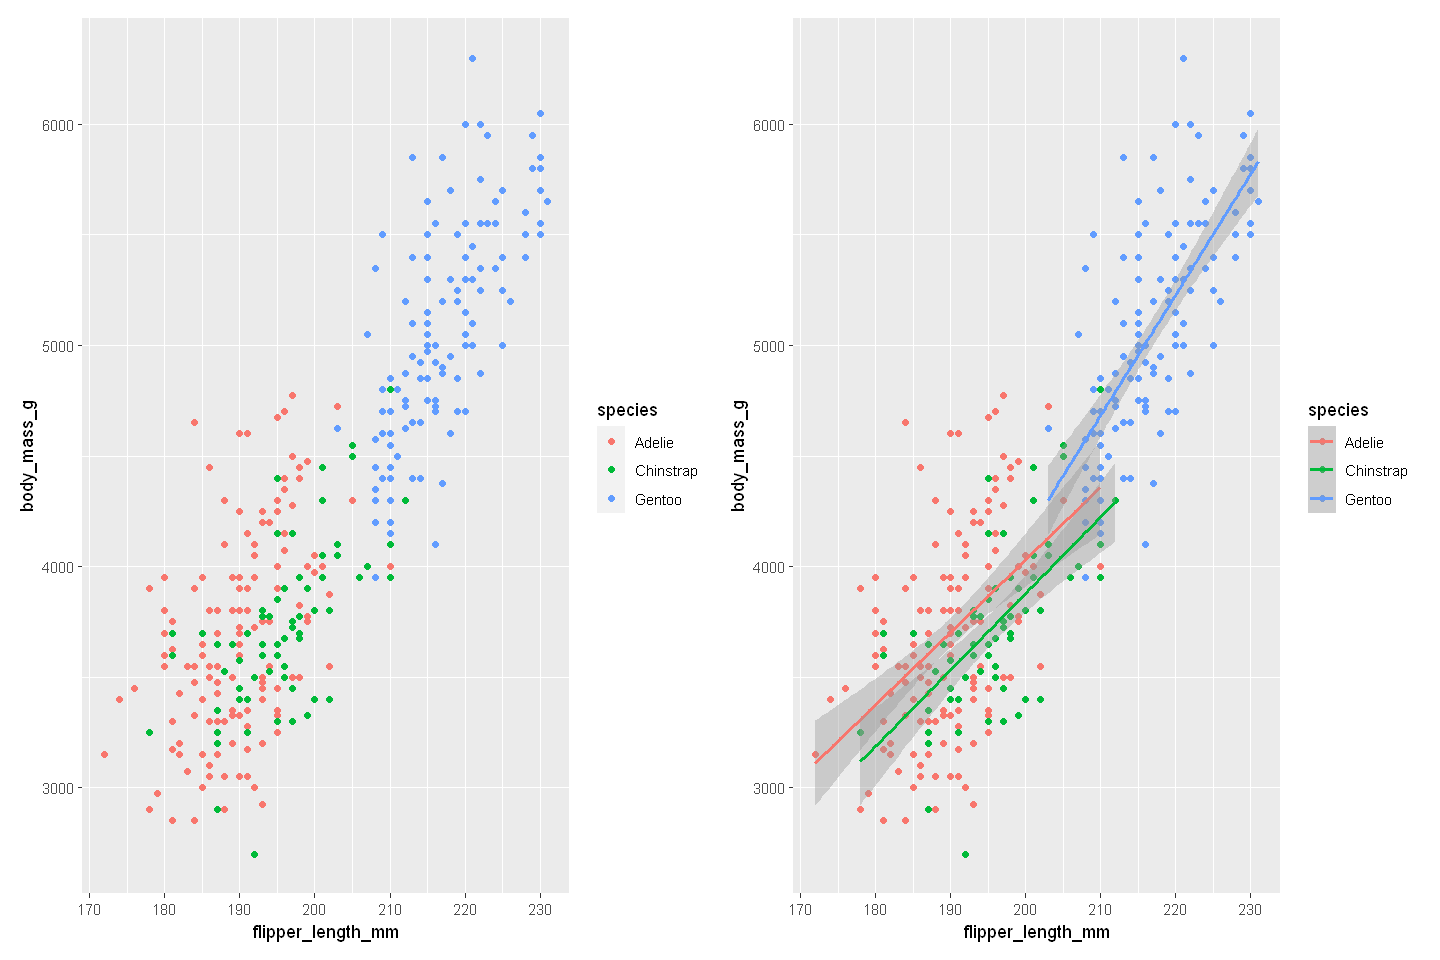

In [10]:
# plot the flipper length vs body mass
p1 = ggplot(
    data = penguins,
    mapping = aes(x = flipper_length_mm, y = body_mass_g, color = species)
) +
    geom_point()

p2 = ggplot(
    data = penguins,
    mapping = aes(x = flipper_length_mm, y = body_mass_g, color = species)
) +
    geom_point() +
    geom_smooth(method = 'lm')

p1 + p2

- `ggplot` gives information how our data will be visually presented
- `geom_point` means we want to have a scatterplot
- `geom_smooth` means we want to add the line of best fit based on a linear model

If we don't want the lines to be separated out:

`geom_smooth()` using formula = 'y ~ x'


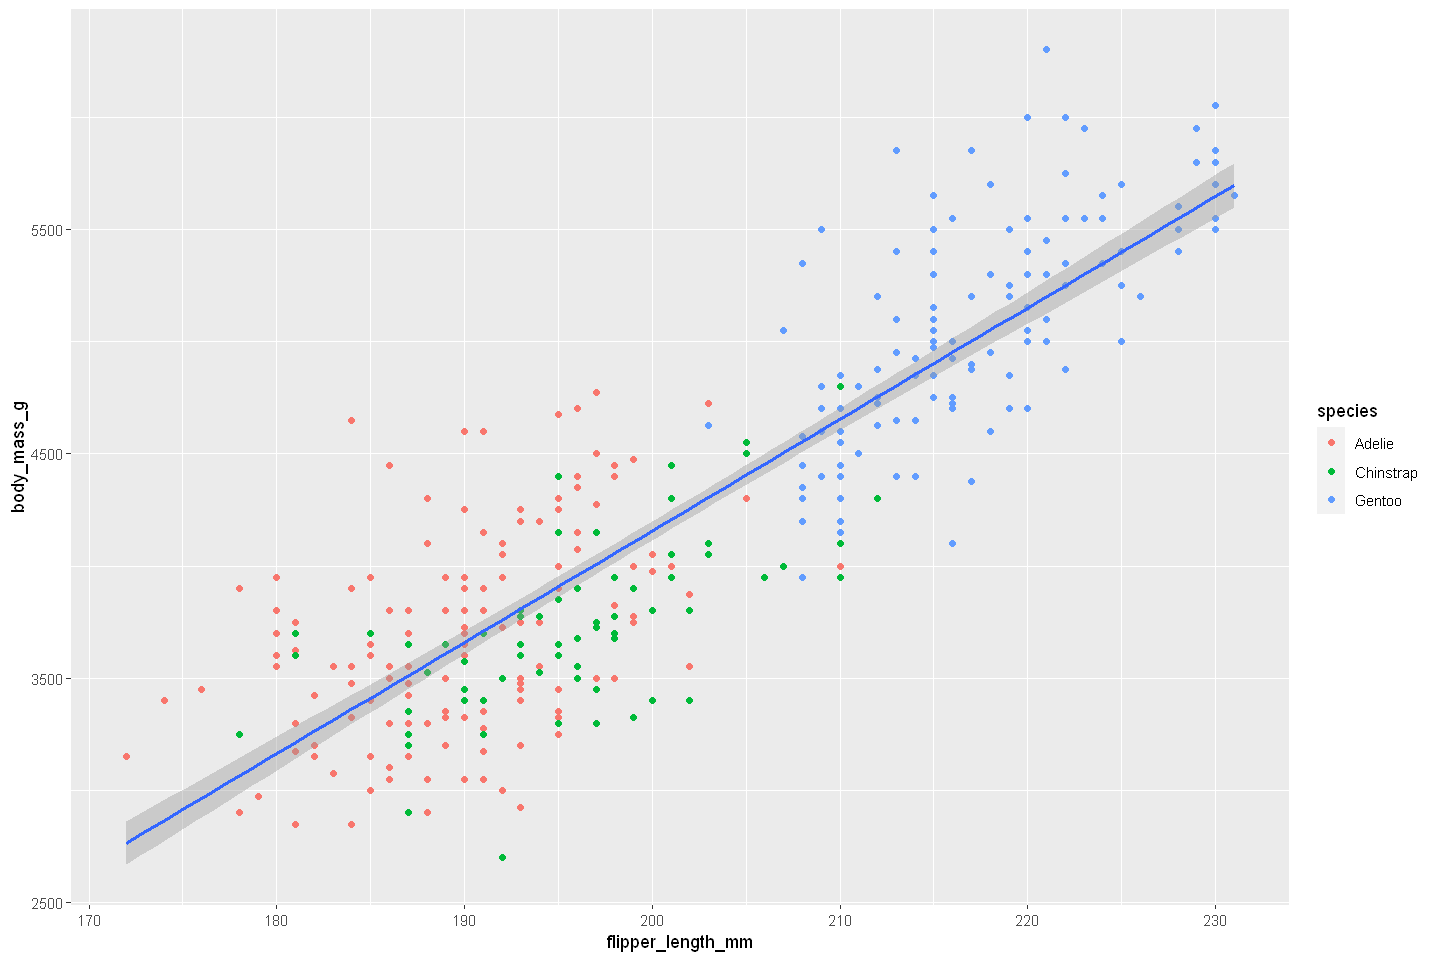

In [12]:
ggplot(
    data = penguins,
    mapping = aes(x = flipper_length_mm, y = body_mass_g)
) +
    geom_point(mapping = aes(color = species)) +
    geom_smooth(method = 'lm')


Finally, let's add some title and color themes to the plot:

`geom_smooth()` using formula = 'y ~ x'


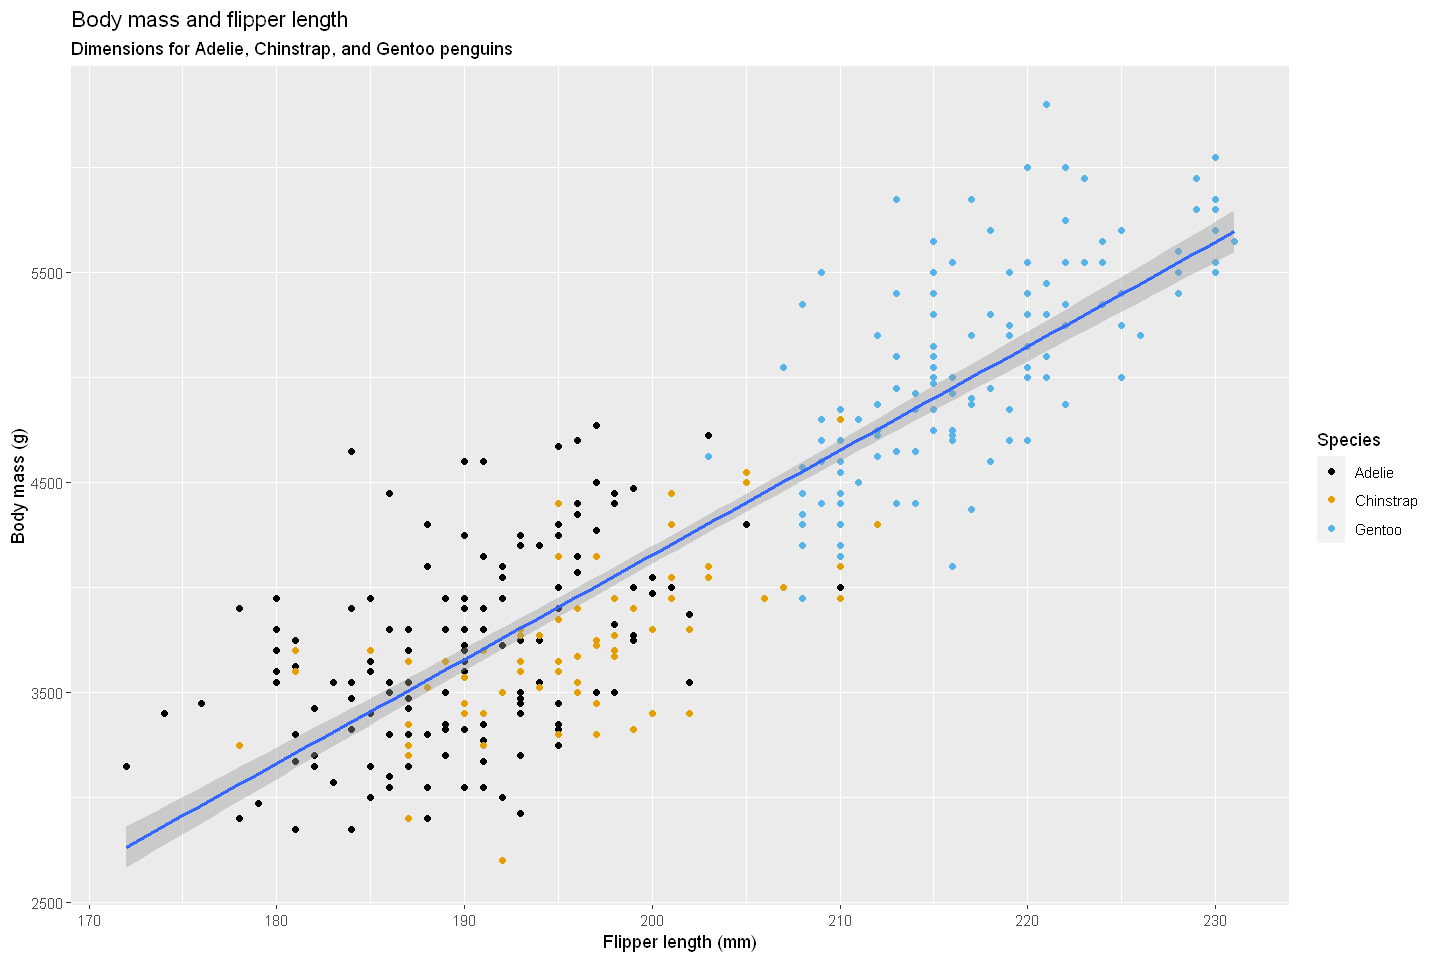

In [14]:
ggplot(
    data = penguins,
    mapping = aes(x = flipper_length_mm, y = body_mass_g)
) +
    geom_point(mapping = aes(color = species)) +
    geom_smooth(method = 'lm') +
    labs(
        title = "Body mass and flipper length",
        subtitle = "Dimensions for Adelie, Chinstrap, and Gentoo penguins",
        x = "Flipper length (mm)", y = "Body mass (g)", color = "Species",
        shape = "Species"
    ) +
    scale_color_colorblind()


## Categorical Variable

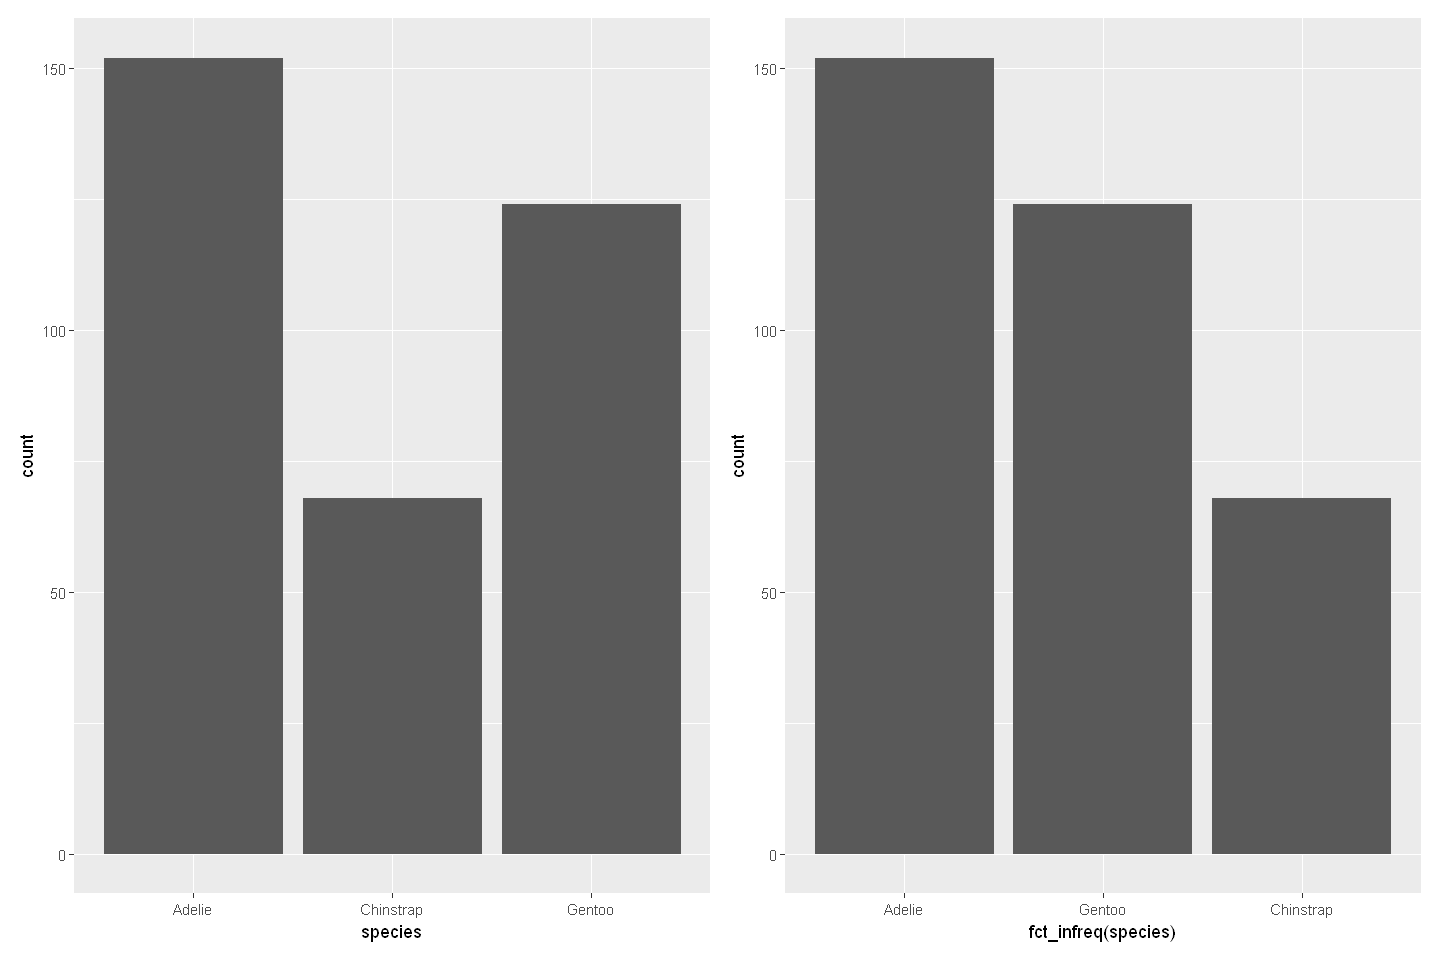

In [15]:
# unorder
p1 = ggplot(penguins, aes(x = species)) +
    geom_bar()

# order
p2 = ggplot(penguins, aes(x = fct_infreq(species))) +
    geom_bar()

p1 + p2

## Numerical Variable

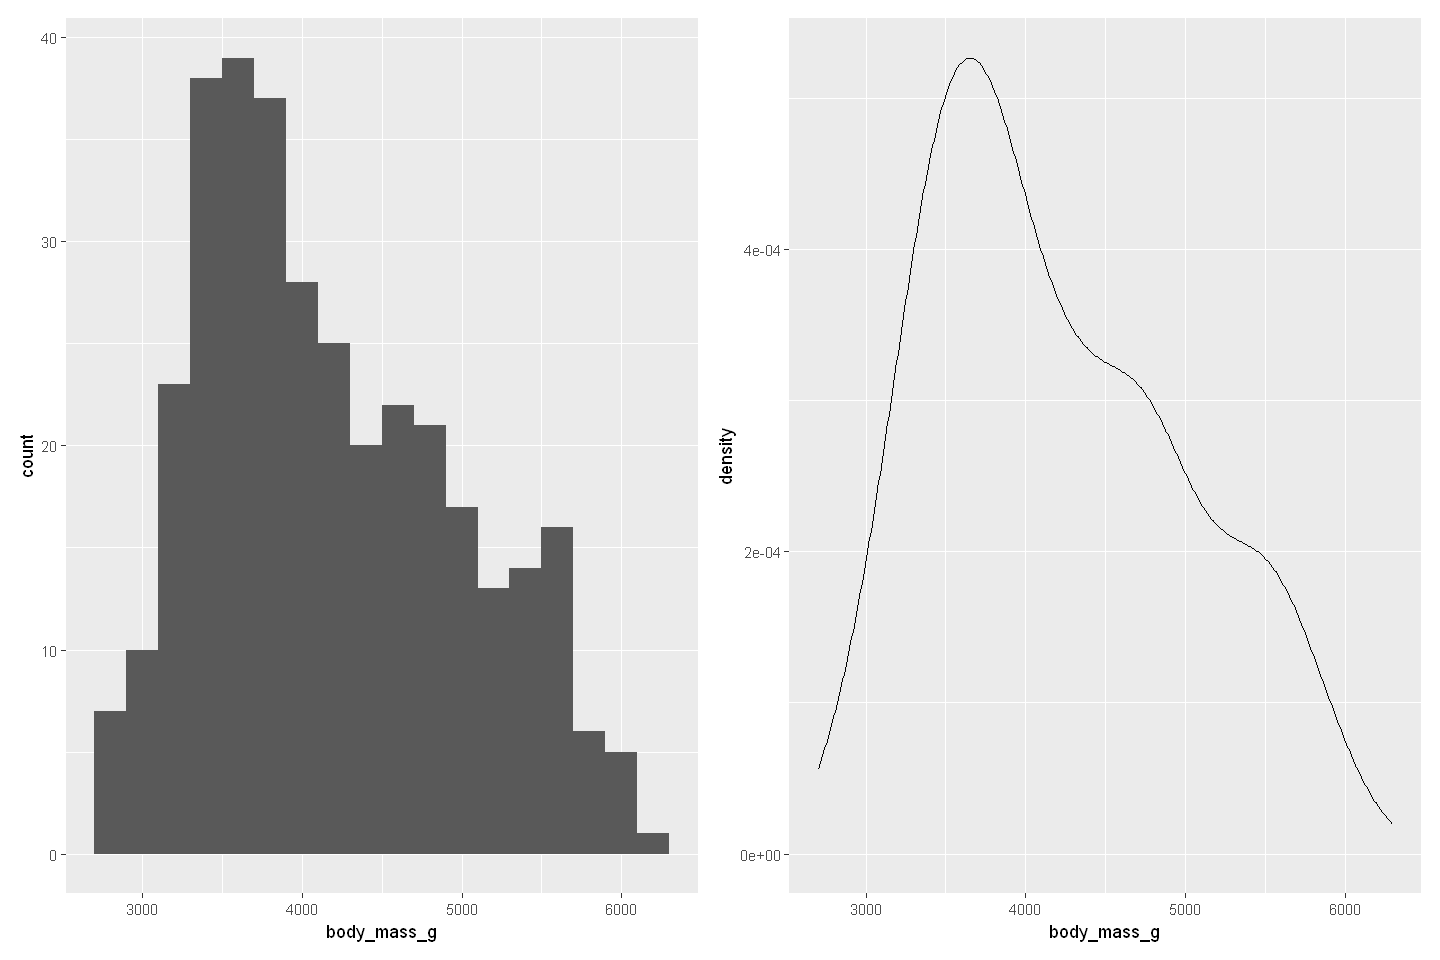

In [16]:
# histogram
p1 = ggplot(penguins, aes(x = body_mass_g)) +
    geom_histogram(binwidth = 200)

# density
p2 = ggplot(penguins, aes(x = body_mass_g)) +
    geom_density()

p1 + p2   

Let's do a more complex one. 

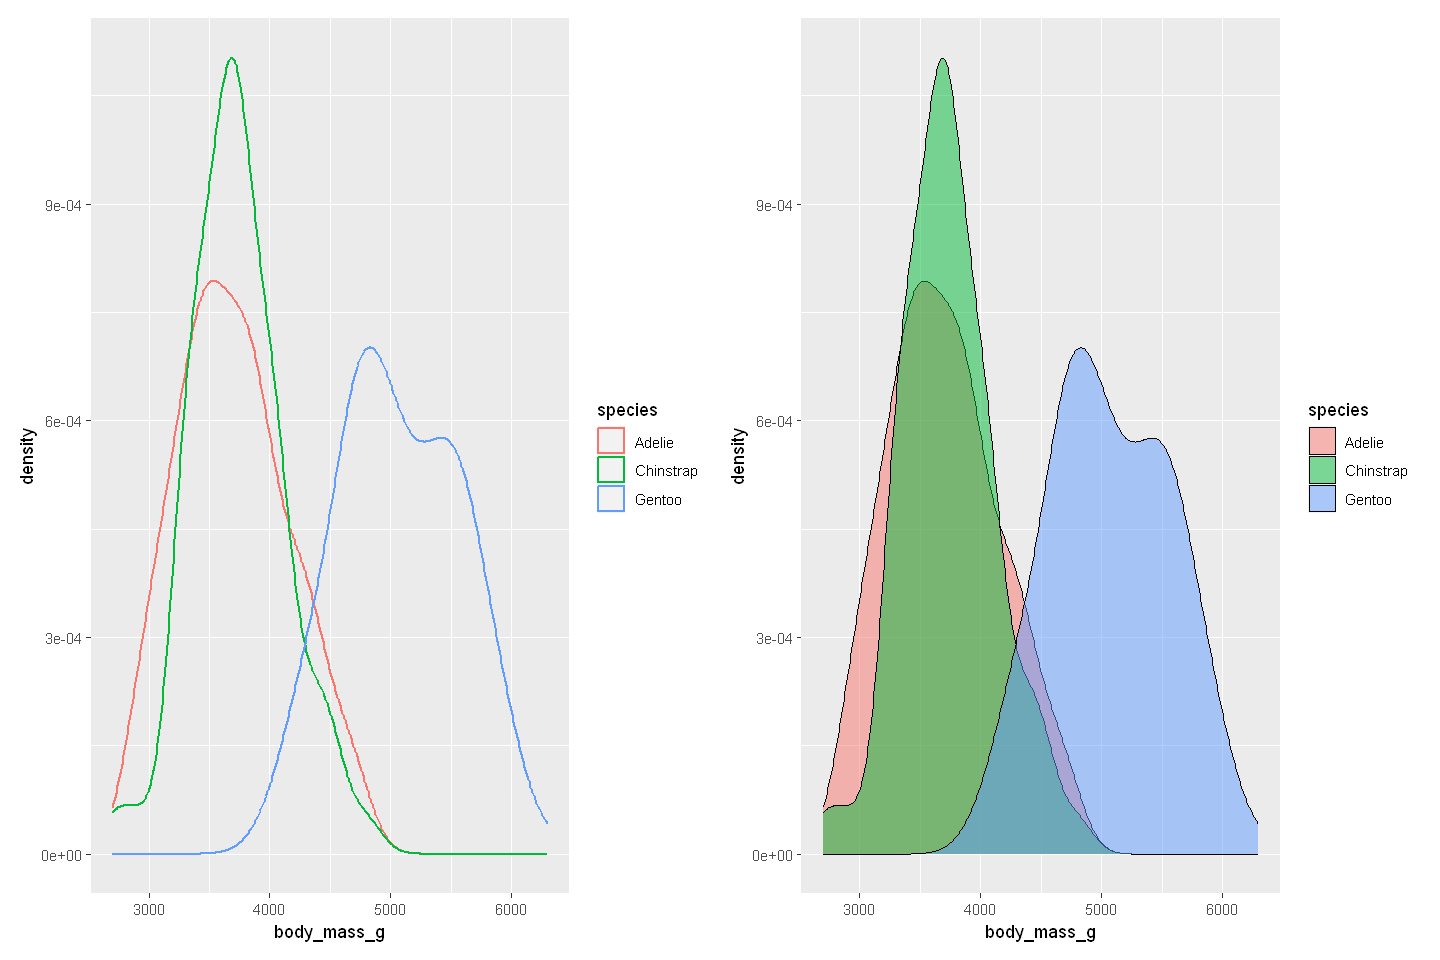

In [20]:
# density by species
p1 = ggplot(penguins, aes(x = body_mass_g, color = species)) +
    geom_density(linewidth = 0.75)

# density by species with fill
p2 = ggplot(penguins, aes(x = body_mass_g, fill = species)) +
    geom_density(alpha = 0.5)

p1 + p2

## Two Categorical Variable

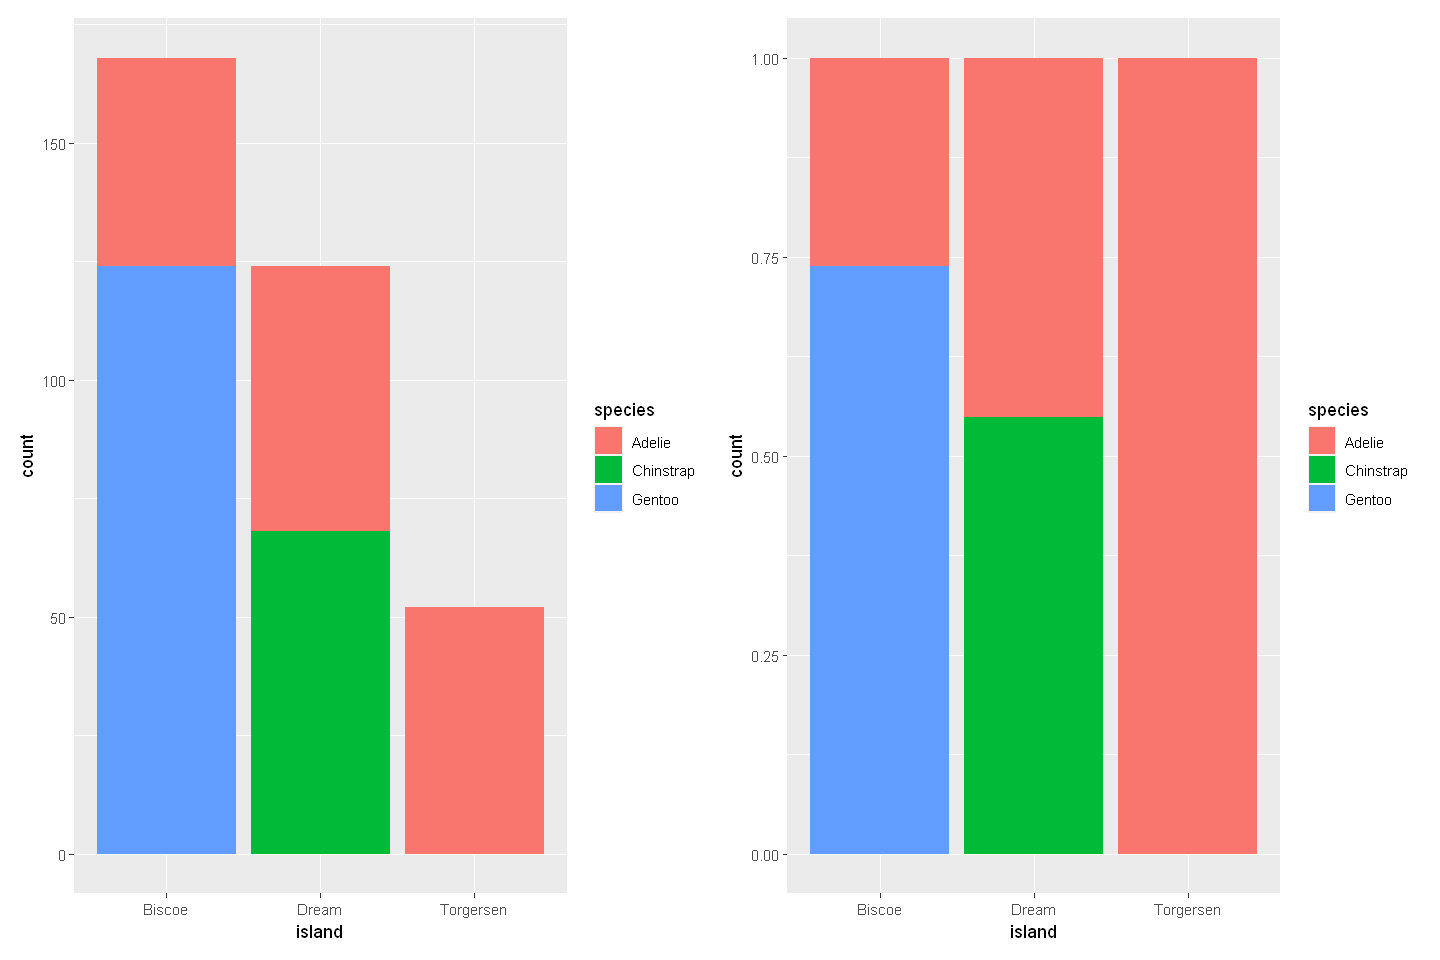

In [22]:
# let's stack two categorical variable by count
p1 = ggplot(penguins, aes(x = island, fill = species)) +
    geom_bar()

# let's stack two categorical variable by proportion
p2 = ggplot(penguins, aes(x = island, fill = species)) +
    geom_bar(position = 'fill')

p1 + p2

## Two Numerical Variable

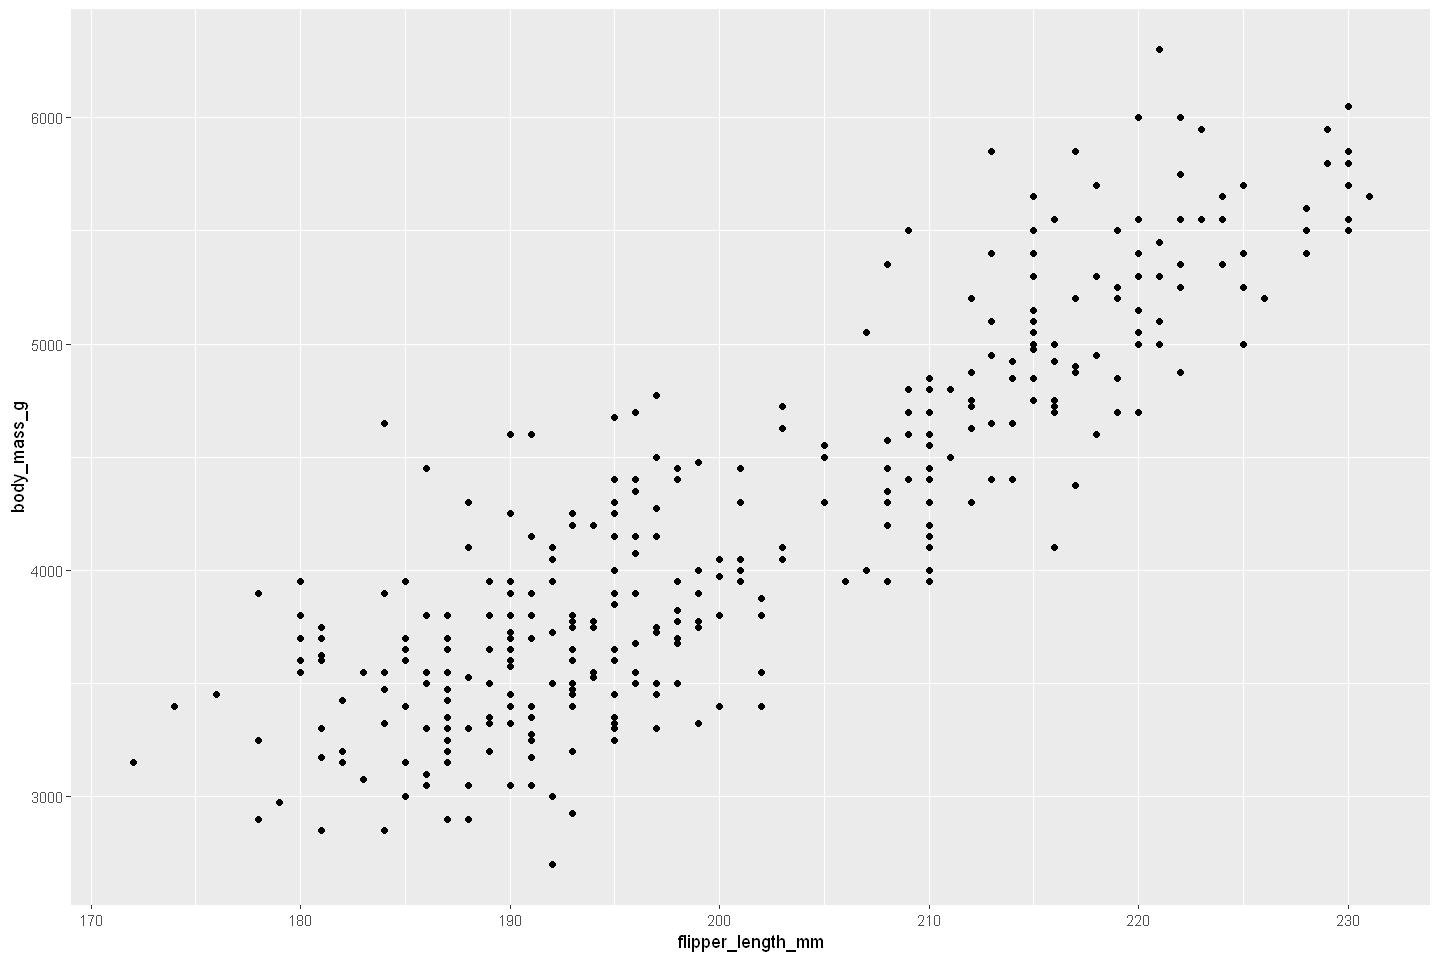

In [23]:
ggplot(penguins, aes(x = flipper_length_mm, y = body_mass_g)) +
    geom_point()

Now, we want to get into more details to see these points according to the species and the island of these penguins

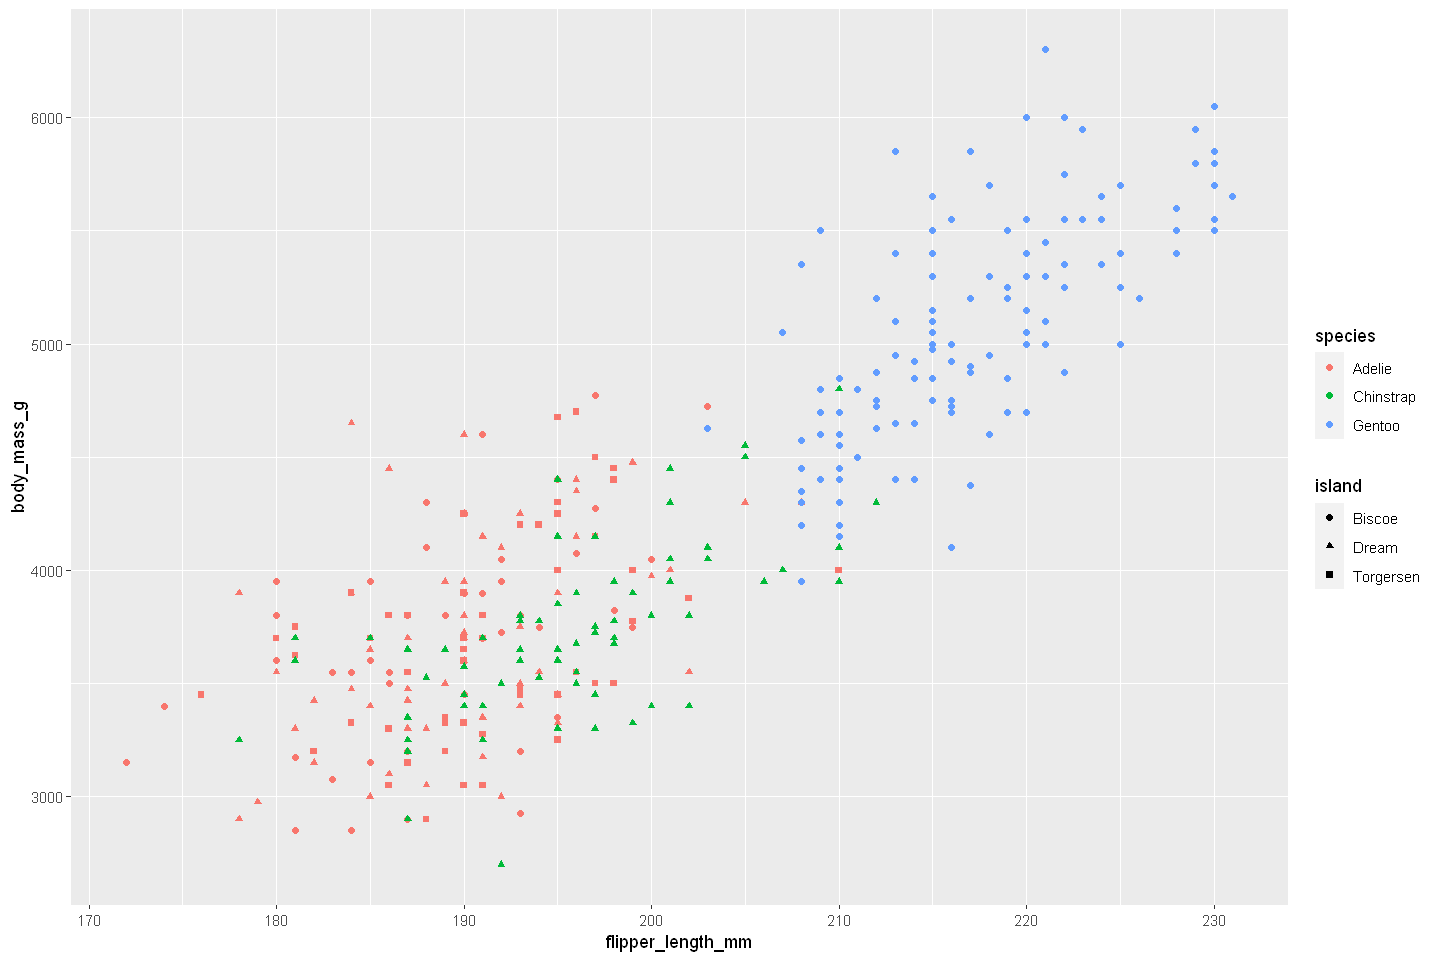

In [24]:
ggplot(penguins, aes(x = flipper_length_mm, y = body_mass_g)) +
    geom_point(aes (color = species, shape = island))

The above plot seems cluttered and hard to see any pattern. Let's produce individual plot based on the island. This can be done with the `facet_wrap` function.

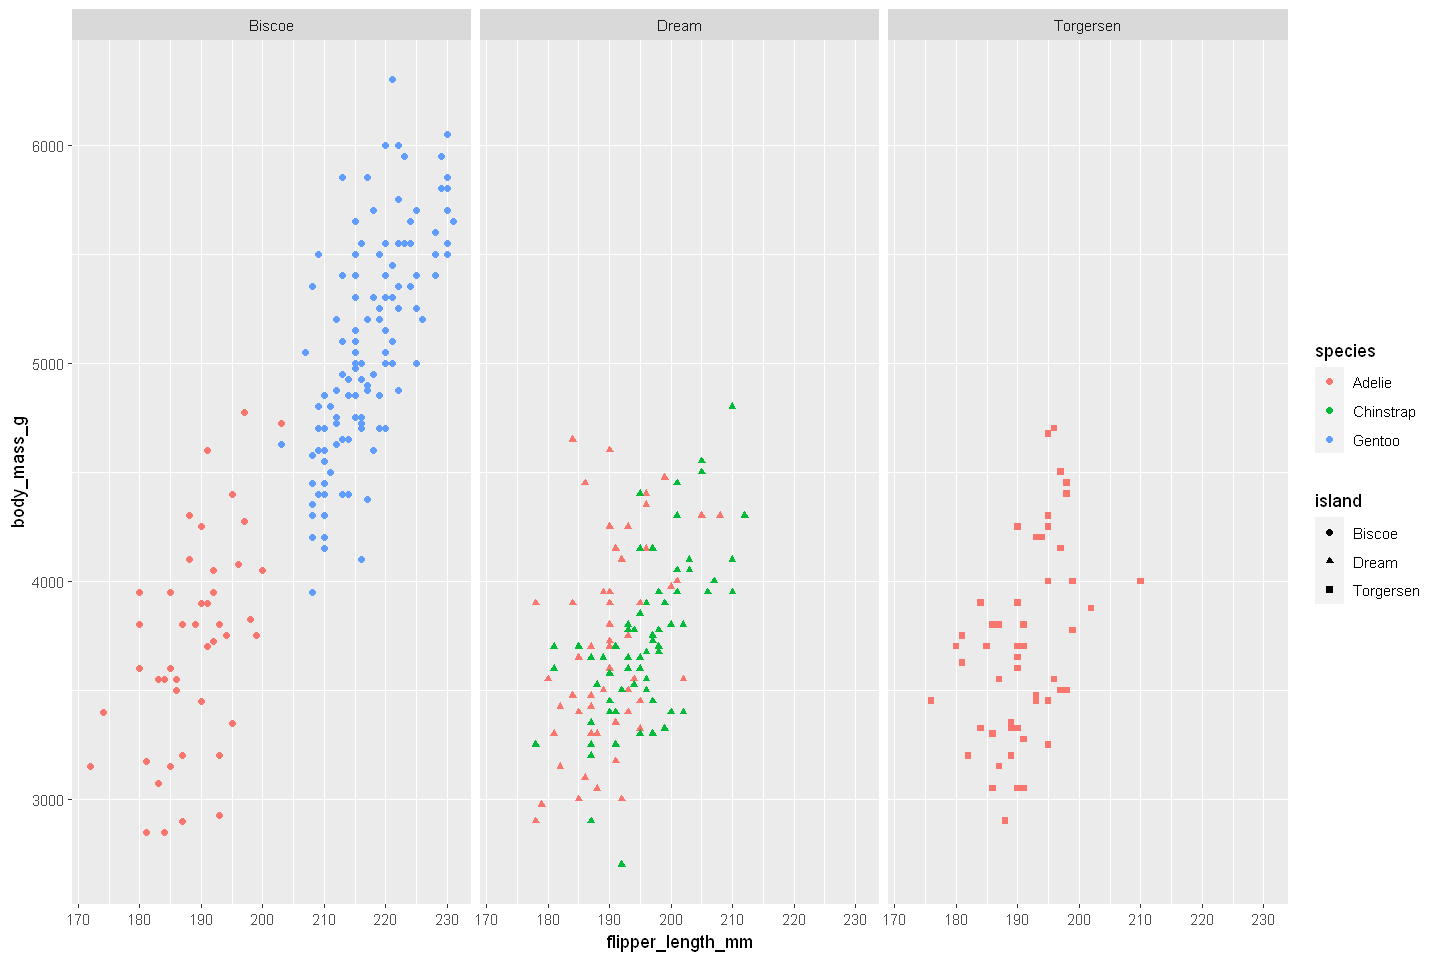

In [25]:
ggplot(penguins, aes(x = flipper_length_mm, y = body_mass_g)) +
    geom_point(aes (color = species, shape = island)) +
    facet_wrap(~island)